# EDA

In [20]:
# 모듈 불러오기
import pandas as pd
import numpy as np
import re
import ast

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.font_manager as fm

from collections import Counter

In [39]:
# 한국어 설정
import platform
from matplotlib import font_manager, rc

path = 'c:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    print('Hangul OK in your MAC!!!')
    rc('font', family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    print('Hangul OK in your Windows!!!')
    rc('font', family=font_name)
else:
    print('Unknown system.. sorry~')

Hangul OK in your Windows!!!


In [82]:
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [83]:
# 데이터 불러오기
final = pd.read_excel('data/justwatch_IMDb.xlsx', index_col=0)
final.head()

,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,total_count,total_rate,...,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url,wins,nominations
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,오징어 게임,Squid Game,2021,1,55,"액션, 드라마, 스릴러",19,대한민국,549000,8.0,...,NaN,NaN,NaN,['Hwang Dong-hyuk'],['Hwang Dong-hyuk'],"['Lee Jung-jae', 'Park Hae-soo', 'Yasushi Iwak...",Squid Game (TV Series 2021),https://www.imdb.com/title/tt10919420/,43,85
1,12인의 심판자,The Twelve,2019,1,54,"드라마, 스릴러",19,벨기에,6500,7.4,...,NaN,NaN,NaN,"['Kaat Beels', 'Wouter Bouvijn']","['Bert Van Dael', 'Nele Meirhaeghe', 'Roel Mon...","['Luc De Ruelle', 'Maaike Neuville', 'Tom Verm...",The Twelve (TV Series 2019–2023),https://www.imdb.com/title/tt7605396/,8,8
2,희생자 게임,The Victims' Game,2020,1,60,"드라마, 범죄, 스릴러",19,대만,1900,7.3,...,NaN,NaN,NaN,"['David Chuang', 'Kuan-Chung Chen']","['Joyce Liu', 'Jui-Liang Hsu', 'Shih-Keng Chie...","['Wei-Ning Hsu', 'Hsiao-chuan Chang', 'Shih-Si...",The Victims' Game (TV Series 2020),https://www.imdb.com/title/tt12079212/,1,12
3,스위트 투스: 사슴뿔을 가진 소년,Sweet Tooth,2021,2,52,"SF, 드라마, 판타지, 액션",15,미국,68000,7.7,...,NaN,NaN,NaN,"['Alexis Ostrander', 'Carol Banker', 'Ciarán F...","['Beth Schwartz', 'Bo Yeon Kim', 'Carly Woodwo...","['Nonso Anozie', 'Christian Convery', 'Stefani...",Sweet Tooth (TV Series 2021),https://www.imdb.com/title/tt12809988/,12,26
4,스위트홈,Sweet Home,2020,2,60,"스릴러, 드라마, 판타지, 공포, SF, 범죄",19,대한민국,33000,7.3,...,NaN,NaN,NaN,"['Jang Young-woo', 'Lee Eung-bok', 'Park So-hy...","['Hong So-ri', 'Hwang Young-Chan', 'Kim Hyung-...","['Song Kang', 'Lee Jin-wook', 'Lee Si-young', ...",Sweet Home (TV Series 2020),https://www.imdb.com/title/tt11612120/,1,3


## 01. 개요

In [68]:
# info
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        905 non-null    object 
 1   english_title       905 non-null    object 
 2   year                905 non-null    int64  
 3   total_season_num    905 non-null    int64  
 4   runtime             905 non-null    int64  
 5   genre               905 non-null    object 
 6   age_rating          905 non-null    object 
 7   production_country  905 non-null    object 
 8   total_count         905 non-null    int64  
 9   total_rate          905 non-null    float64
 10  watchlist           905 non-null    int64  
 11  popularity          905 non-null    int64  
 12  user_review         905 non-null    int64  
 13  critic_review       905 non-null    int64  
 14  production          821 non-null    object 
 15  distributor         897 non-null    object 
 16  season_1     

In [69]:
# describe
final.describe()

,year,total_season_num,runtime,total_count,total_rate,watchlist,popularity,user_review,critic_review,season_12,season_13,season_14,season_15,season_16,season_17,wins,nominations
count,905.000000,905.000000,905.000000,9.050000e+02,905.000000,9.050000e+02,905.000000,905.000000,905.000000,0.0,0.0,0.0,0.0,0.0,0.0,905.000000,905.000000
mean,2019.471823,1.664088,47.428729,3.781120e+04,7.135249,4.057680e+04,1124.878453,281.707182,21.159116,NaN,NaN,NaN,NaN,NaN,NaN,3.692818,10.008840
std,4.011258,1.401596,13.787164,1.240222e+05,0.917134,1.057443e+05,1464.975808,533.780799,33.659525,NaN,NaN,NaN,NaN,NaN,NaN,11.484532,30.736209
min,1966.000000,1.000000,10.000000,1.410000e+02,3.200000,0.000000e+00,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,2018.000000,1.000000,41.000000,2.100000e+03,6.600000,2.400000e+03,0.000000,28.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,2020.000000,1.000000,47.000000,6.100000e+03,7.300000,6.900000e+03,190.000000,85.000000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
75%,2022.000000,2.000000,56.000000,2.300000e+04,7.800000,2.900000e+04,2170.000000,277.000000,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,7.000000
max,2023.000000,11.000000,95.000000,2.200000e+06,9.500000,1.168000e+06,4951.000000,5700.000000,425.000000,NaN,NaN,NaN,NaN,NaN,NaN,157.000000,391.000000


In [70]:
# insull()
final.isnull().sum()

korean_title            0
english_title           0
year                    0
total_season_num        0
runtime                 0
genre                   0
age_rating              0
production_country      0
total_count             0
total_rate              0
watchlist               0
popularity              0
user_review             0
critic_review           0
production             84
distributor             8
season_1                0
season_2              639
season_3              769
season_4              826
season_5              856
season_6              870
season_7              884
season_8              897
season_9              901
season_10             903
season_11             904
season_12             905
season_13             905
season_14             905
season_15             905
season_16             905
season_17             905
director               24
writer                 27
actor                   0
imdb_title              0
imdb_url                0
wins        

## 02. 시즌 개수

In [71]:
# total_season_num
final['total_season_num'].value_counts().sort_index()

total_season_num
1     639
2     130
3      57
4      30
5      14
6      14
7      13
8       4
9       2
10      1
11      1
Name: count, dtype: int64

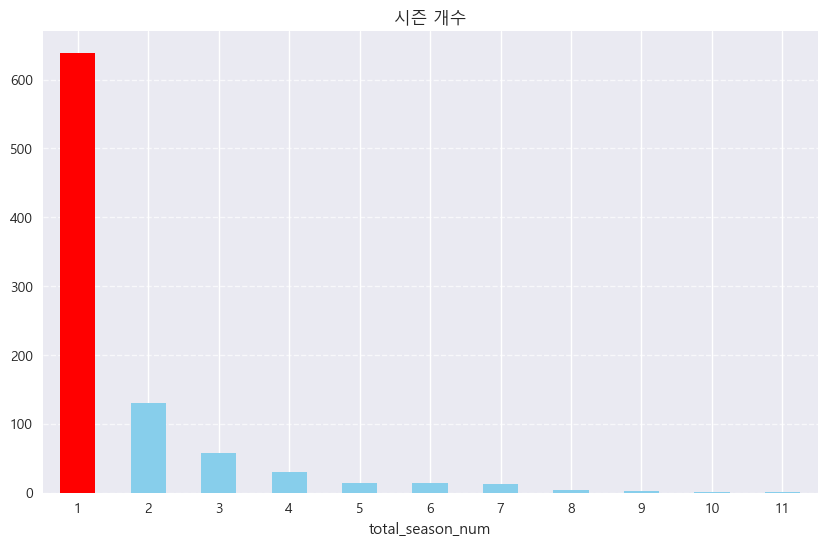

In [72]:
# total_season_num
value_counts = final['total_season_num'].value_counts().sort_index()

# 막대 그래프 시각화
colors = ['red' if season == 1 else 'skyblue' for season in value_counts.index]

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color=colors)
plt.title('시즌 개수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [73]:
# 시즌 2 이상 드라마 개수 및 비율
len(final[final['total_season_num'] >= 2]), round(len(final[final['total_season_num'] >= 2]) / len(final['total_season_num']), 2)

(266, 0.29)

In [74]:
# 시즌이 8 이상인 드라마
final[final['total_season_num'] >= 8]

,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,total_count,total_rate,...,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url,wins,nominations
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
7,워킹 데드,The Walking Dead,2010,11,46,"드라마, SF, 액션, 공포, 스릴러",19,미국,1100000,8.1,...,NaN,NaN,NaN,"['Aisha Tyler', 'Alrick Riley', 'Avi Youabian'...","['Adam Fierro', 'Angela Kang', 'Channing Powel...","['Norman Reedus', 'Melissa McBride', 'Lauren C...",The Walking Dead (TV Series 2010–2022),https://www.imdb.com/title/tt1520211/,85,237
9,플래시,The Flash,2014,9,45,"액션, 드라마, SF",15,미국,369000,7.5,...,NaN,NaN,NaN,"['Alexandra La Roche', 'Alice Troughton', 'Ama...","['Aaron Helbing', 'Alex Boyd', 'Alison Schapke...","['Grant Gustin', 'Candice Patton', 'Danielle P...",The Flash (TV Series 2014–2023),https://www.imdb.com/title/tt3107288/,29,99
12,슈츠,Suits,2011,9,44,"코미디, 드라마",15,미국,483000,8.4,...,NaN,NaN,NaN,"['Aaron Korsh', 'Adam Davidson', 'Anton Croppe...","['Aaron Korsh', 'Chris Downey', 'Daniel Arkin'...","['Gabriel Macht', 'Rick Hoffman', 'Sarah Raffe...",Suits (TV Series 2011–2019),https://www.imdb.com/title/tt1632701/,1,9
23,블랙리스트,The Blacklist,2013,10,43,"스릴러, 범죄, 드라마",15,미국,281000,7.9,...,NaN,NaN,NaN,"['Adam Arkin', 'Adam T. Weisinger', 'Alex Zakr...","['Adam Sussman', 'Aiah Samba', 'Allison Glock-...","['James Spader', 'Diego Klattenhoff', 'Harry L...",The Blacklist (TV Series 2013–2023),https://www.imdb.com/title/tt2741602/,2,33
26,뱀파이어 다이어리,The Vampire Diaries,2009,8,42,"SF, 판타지, 공포, 로맨스, 스릴러, 드라마",19,미국,352000,7.7,...,NaN,NaN,NaN,"['Brad Turner', 'Carol Banker', 'Charles Beeso...","['Alan B. McElroy', 'Alfredo Septién', 'Andrew...","['Paul Wesley', 'Ian Somerhalder', 'Kat Graham...",The Vampire Diaries (TV Series 2009–2017),https://www.imdb.com/title/tt1405406/,38,67
28,하우스,House,2004,8,44,"드라마, 스릴러",15,미국,519000,8.7,...,NaN,NaN,NaN,"['Andrew Bernstein', 'Bill Johnson', 'Bryan Si...","['Carol Green', 'Charles M. Duncan', 'Danny We...","['Hugh Laurie', 'Robert Sean Leonard', 'Omar E...",House (TV Series 2004–2012),https://www.imdb.com/title/tt0412142/,58,140
54,덱스터,Dexter,2006,8,53,"범죄, 드라마, 스릴러",19,미국,774000,8.6,...,NaN,NaN,NaN,"['Adam Davidson', 'Alik Sakharov', 'Brian Kirk...","['Adam Fierro', 'Arika Lisanne Mittman', 'Char...","['Michael C. Hall', 'Jennifer Carpenter', 'Dav...",Dexter (TV Series 2006–2013),https://www.imdb.com/title/tt0773262/,54,197
116,웬트워스,Wentworth,2013,8,46,"드라마, 범죄, 스릴러",19,호주,25000,8.6,...,NaN,NaN,NaN,"['Adrian Russell Wills', 'Beck Cole', 'Catheri...","['Adam Todd', 'Andrew Anastasios', 'Emma J. St...","['Kate Atkinson', 'Katrina Milosevic', 'Robbie...",Wentworth (TV Series 2013–2021),https://www.imdb.com/title/tt2433738/,19,75


## 03. 연도

In [75]:
# 2018 이후에 방영된 드라마 개수
len(final[final['year'] >= 2018]), round(len(final[final['year'] >= 2018]) / len(final['year']), 2)

(729, 0.81)

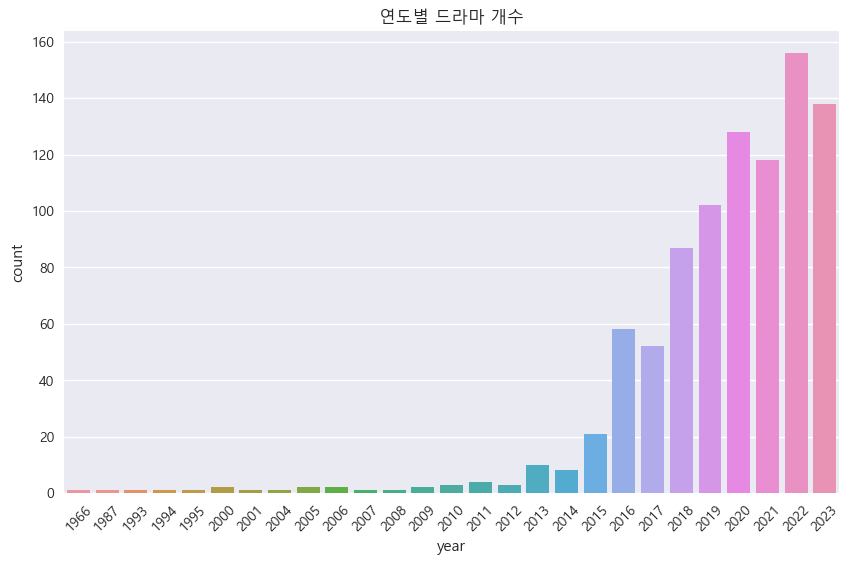

In [76]:
# 연도별 드라마 개수
plt.figure(figsize=(10, 6))
sns.countplot(data=final, x='year')
plt.title('연도별 드라마 개수')
plt.xticks(rotation=45)
plt.show()

In [77]:
df_1 = final[final['total_season_num']==1]
df_2 = final[final['total_season_num']>=2]

C:\Users\June\AppData\Local\Temp\ipykernel_22064\2603994175.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


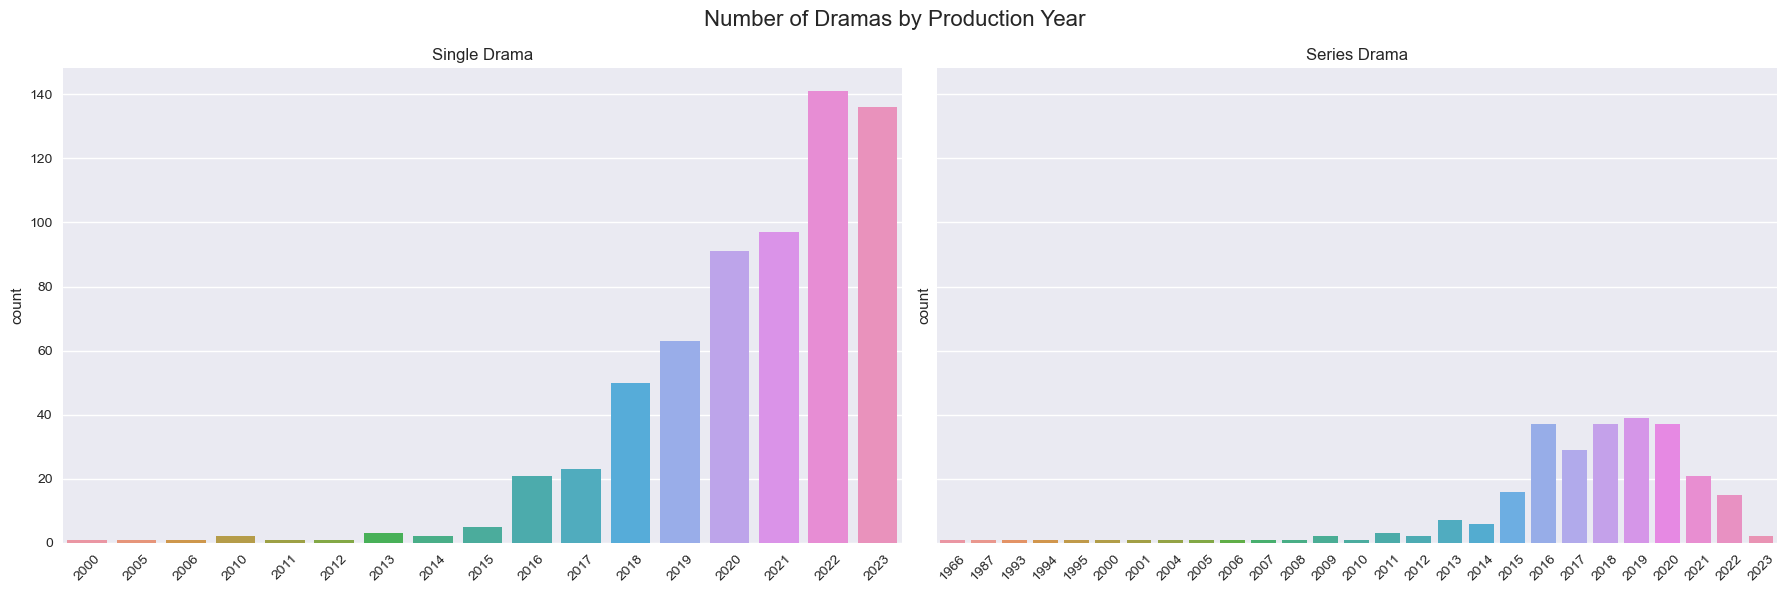

In [78]:
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 그래프 스타일 설정
plt.style.use('seaborn')

# 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# subplot 1: df_1
sns.countplot(data=df_1, x='year', ax=axes[0])
axes[0].set_title('Single Drama')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)

# subplot 2: df_2
sns.countplot(data=df_2, x='year', ax=axes[1])
axes[1].set_title('Series Drama')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)

# 전체 그래프의 제목 설정
fig.suptitle('Number of Dramas by Production Year', fontsize=16)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()


## 04. 장르

In [79]:
# 장르
genre = []
for idx, row in final.iterrows():
    tmp_list= row['genre'].split(', ')
    for x in tmp_list:
        genre.append(x)

counts = Counter(genre)
counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
for element, count in counts[1:]:
    print(f'{element}: {count}')

스릴러: 353
코미디: 290
범죄: 266
로맨스: 218
SF: 182
액션: 153
판타지: 127
공포: 75
역사: 53
가족: 38
전쟁: 29
Made in Europe: 20
음악: 18
스포츠: 12
서부: 5


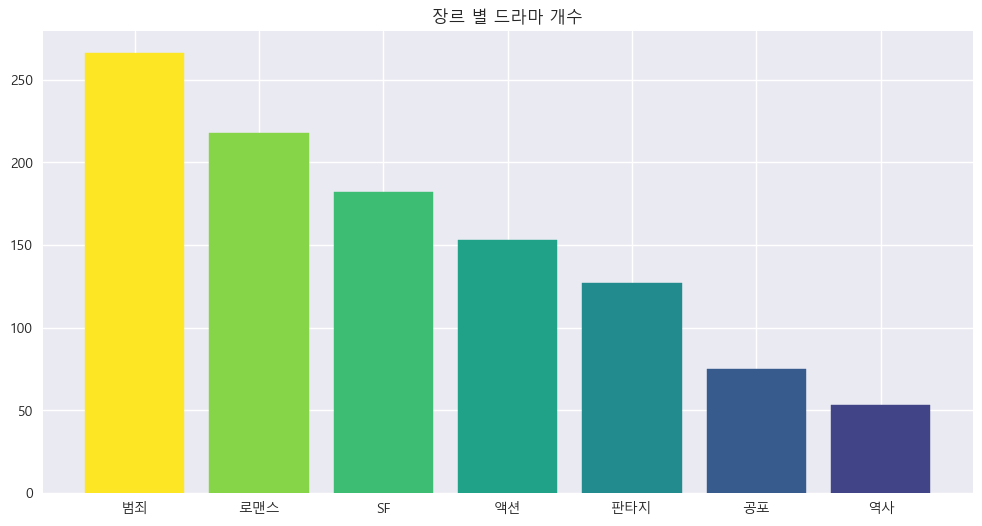

In [84]:
# 튜플의 각 요소를 분리
counts = counts[1:]
counts = counts[:9]
genre, cnt = zip(*counts)

# 국가별 드라마 개수 시각화
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6))
bars = plt.bar(genre, cnt)

for bar, height in zip(bars, cnt):
    bar.set_color(cmap(height / max(cnt)))

plt.title('장르 별 드라마 개수')
plt.show()

## 05. 연령 등급

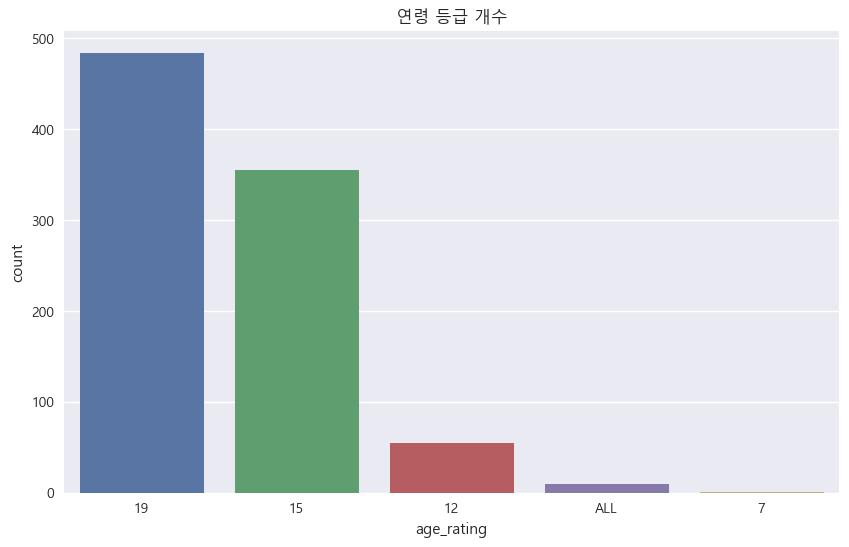

In [42]:
# 연령 등급 개수
plt.figure(figsize=(10, 6))
sns.countplot(data=final, x='age_rating')
plt.title('연령 등급 개수')
plt.show()

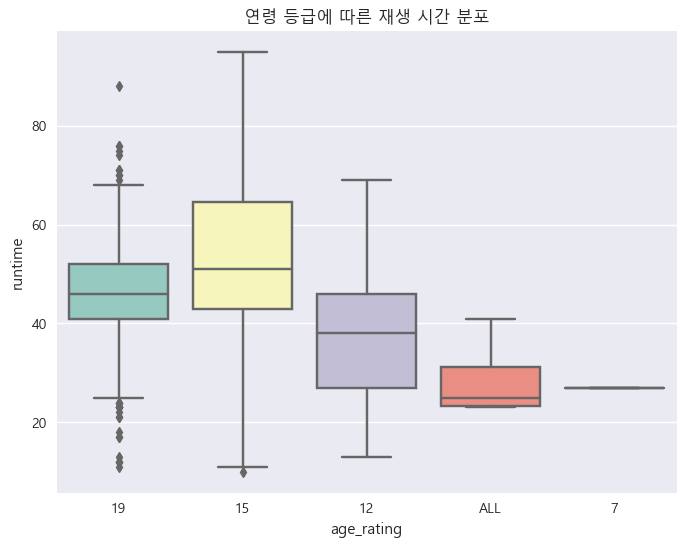

In [43]:
# 연령 등급에 따른 재생 시간 분포
plt.figure(figsize=(8, 6))
sns.boxplot(x='age_rating', y='runtime', data=final, palette='Set3')
plt.title('연령 등급에 따른 재생 시간 분포')
plt.show()

## 06. 제작 국가

In [44]:
# 제작 국가 상위 20개
country = []
for idx, row in final.iterrows():
    tmp_list= row['production_country'].split(', ')
    for x in tmp_list:
        country.append(x)

counts = Counter(country)
counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
for element, count in counts[:20]:
    print(f'{element}: {count}')

미국: 232
대한민국: 177
영국: 67
스페인: 52
일본: 43
인도: 38
독일: 28
프랑스: 28
멕시코: 25
터키: 22
캐나다: 18
호주: 18
브라질: 18
중국: 17
폴란드: 17
이탈리아: 16
벨기에: 13
스웨덴: 13
대만: 12
덴마크: 12


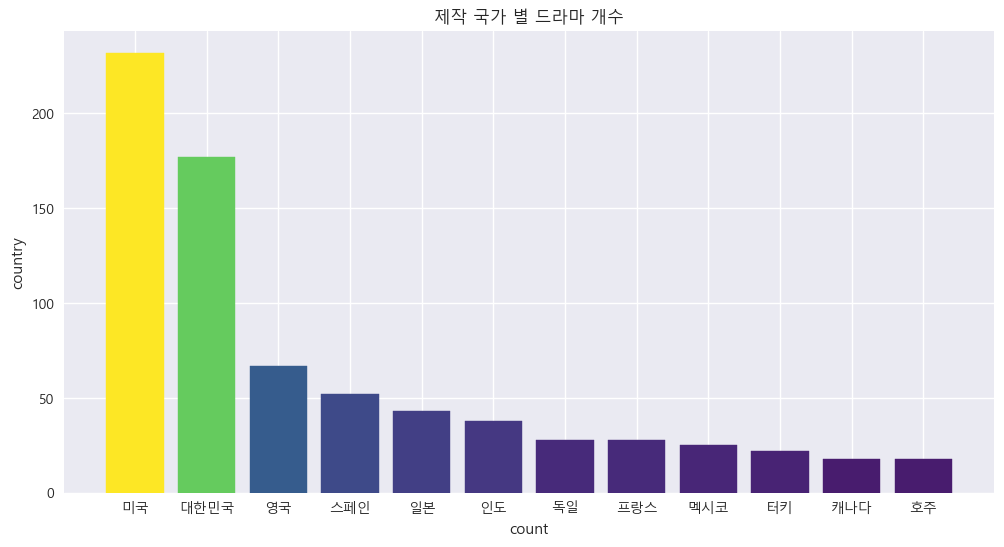

In [45]:
# 튜플의 각 요소를 분리
counts = counts[:12]
country, cnt = zip(*counts)

# 국가별 드라마 개수 시각화
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 6))
bars = plt.bar(country, cnt)

for bar, height in zip(bars, cnt):
    bar.set_color(cmap(height / max(cnt)))

plt.xlabel('count')
plt.ylabel('country')
plt.title('제작 국가 별 드라마 개수')
plt.show()

## 07. 나라 별 TOP 감독

In [46]:
# 결측치 처리
final['production_country'] = final['production_country'].fillna('')
final['director'] = final['director'].fillna('[]').apply(eval)

# 나라와 감독 데이터프레임 생성
country_directors = []

for index, row in final.iterrows():
    countries = row['production_country'].split(',')
    directors = row['director']
    for country in countries:
        for director in directors:
            country_directors.append({'country': country.strip(), 'director': director.strip()})

country_directors_df = pd.DataFrame(country_directors)

# 각 나라별 상위 10명의 감독 추출
top_directors_per_country = {}

for country, group in country_directors_df.groupby('country'):
    director_counts = Counter(group['director'])
    top_directors = director_counts.most_common(10)
    top_directors_per_country[country] = top_directors

# 결과 출력
for country, directors in top_directors_per_country.items():
    print(f"Country: {country}")
    for director, count in directors:
        print(f"  {director}: {count} 작품")
    print()

Country: 그리스
  Akis Polizos: 1 작품
  Christopher Papakaliatis: 1 작품

Country: 나이지리아
  Catherine Stewart: 1 작품
  Kayode Kasum: 1 작품
  Biyi Bandele: 1 작품
  Kenneth Gyang: 1 작품
  Dimeji Ajibola: 1 작품

Country: 남아프리카공화국
  Travis Taute: 2 작품
  Johnny Barbuzano: 2 작품
  Rolie Nikiwe: 2 작품
  Daryne Joshua: 1 작품
  Keitumetse Qhali: 1 작품
  Mmabatho Montsho: 1 작품
  Nosipho Dumisa: 1 작품
  Nozipho Nkelemba: 1 작품
  Thati Pele: 1 작품
  Zenn van Zyl: 1 작품

Country: 네덜란드
  Ben Sombogaart: 1 작품
  Dries Vos: 1 작품
  Anna van der Heide: 1 작품
  Pieter Bart Korthuis: 1 작품
  Tomas Kaan: 1 작품
  Giancarlo Sanchez: 1 작품
  Michiel ten Horn: 1 작품
  Beer ten Kate: 1 작품

Country: 노르웨이
  Per-Olav Sørensen: 2 작품
  Baldvin Zophoníasson: 1 작품
  Baltasar Kormákur: 1 작품
  Börkur Sigþórsson: 1 작품
  Katrín Björgvinsdóttir: 1 작품
  Ugla Hauksdóttir: 1 작품
  Óskar Thór Axelsson: 1 작품
  Jannik Johansen: 1 작품
  Mads Kamp Thulstrup: 1 작품
  Mogens Hagedorn: 1 작품

Country: 뉴질랜드
  Craig Irvin: 1 작품
  Gerard Johnstone: 1 작품
  Peter Andr

### 시각화

C:\Users\June\AppData\Local\Temp\ipykernel_22064\531787399.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\531787399.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\531787399.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\531787399.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\531787399.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\531787399.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\531787399.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local

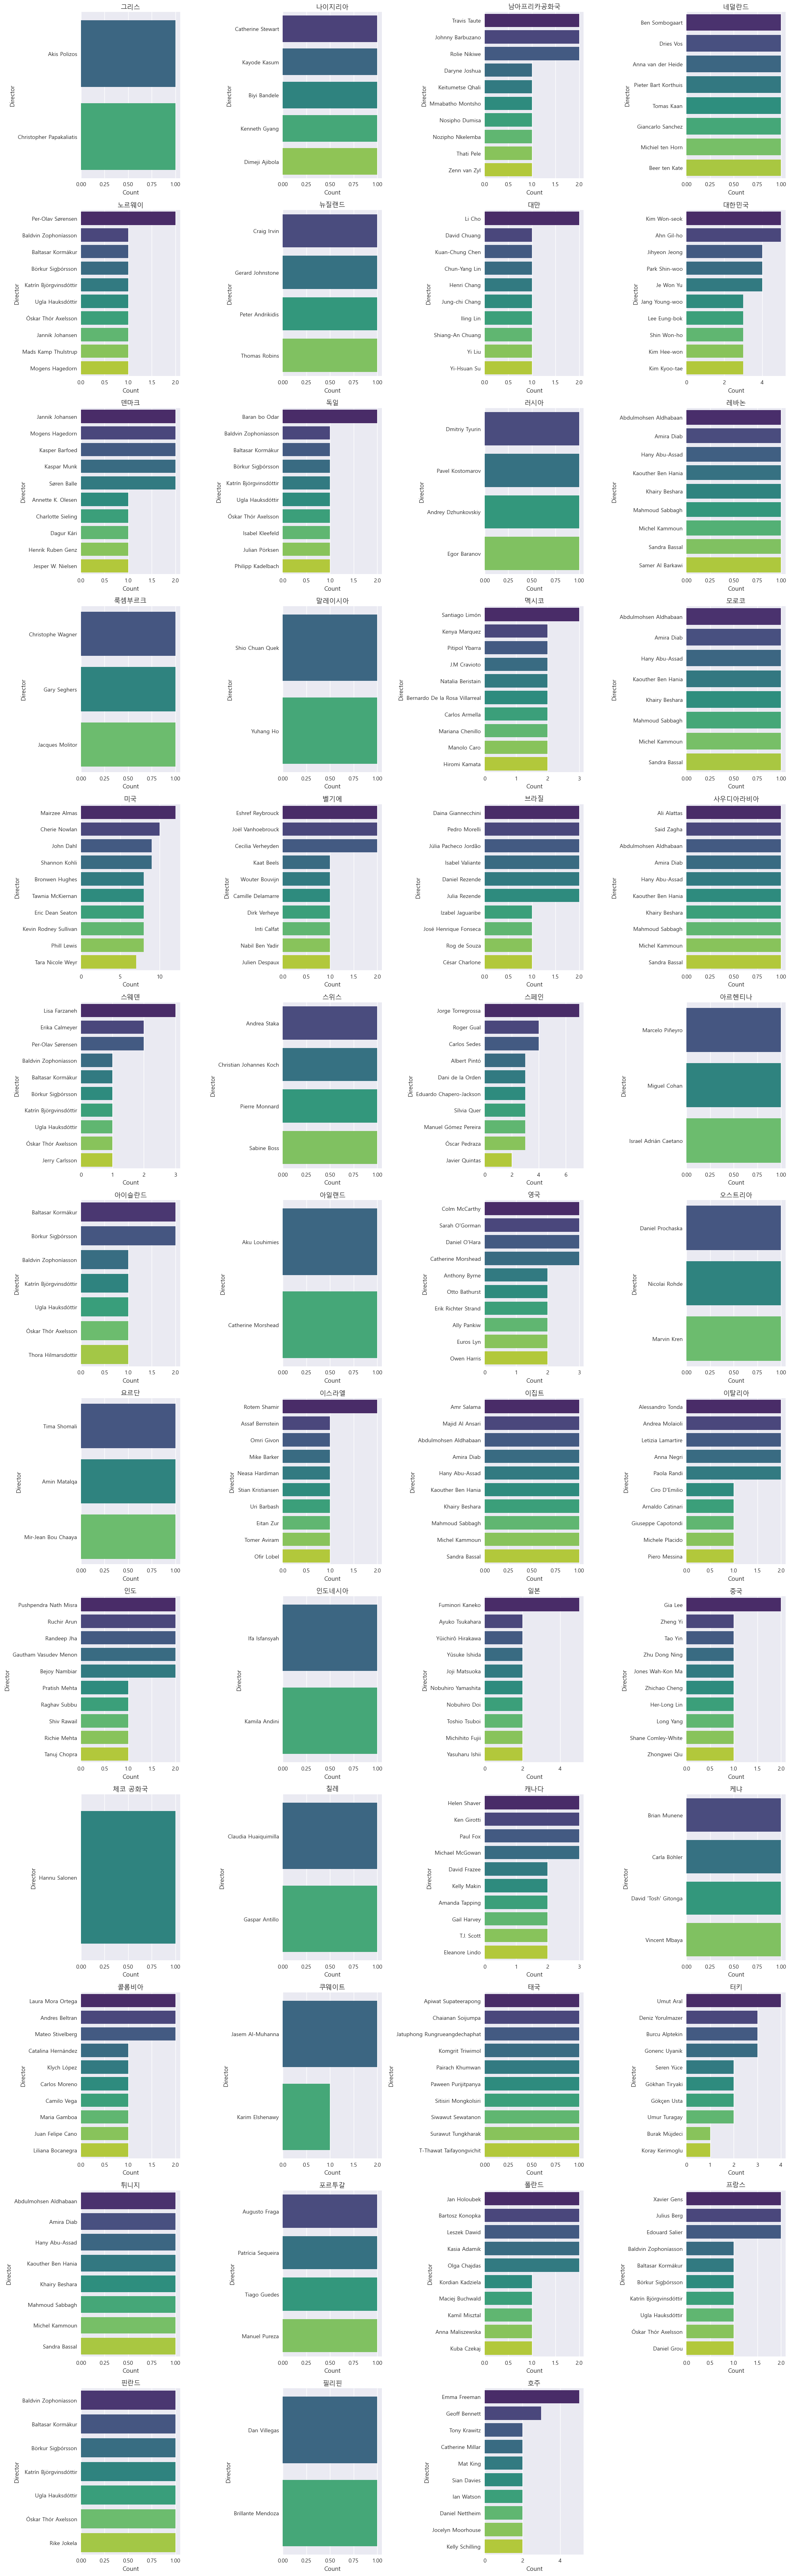

In [47]:
# subplot 생성
num_countries = len(top_directors_per_country)
num_rows = (num_countries // 4) + 1
plt.figure(figsize=(20, 5 * num_rows))

for idx, (country, directors) in enumerate(top_directors_per_country.items()):
    directors_df = pd.DataFrame(directors, columns=['Director', 'Count'])
    
    plt.subplot(num_rows, 4, idx + 1)
    sns.barplot(x='Count', y='Director', data=directors_df, palette='viridis')
    plt.title(country)
    plt.tight_layout()

plt.show()

### 나라 TOP5, 감독 TOP5

C:\Users\June\AppData\Local\Temp\ipykernel_22064\531787399.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\531787399.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\531787399.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\531787399.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\531787399.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\531787399.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\531787399.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local

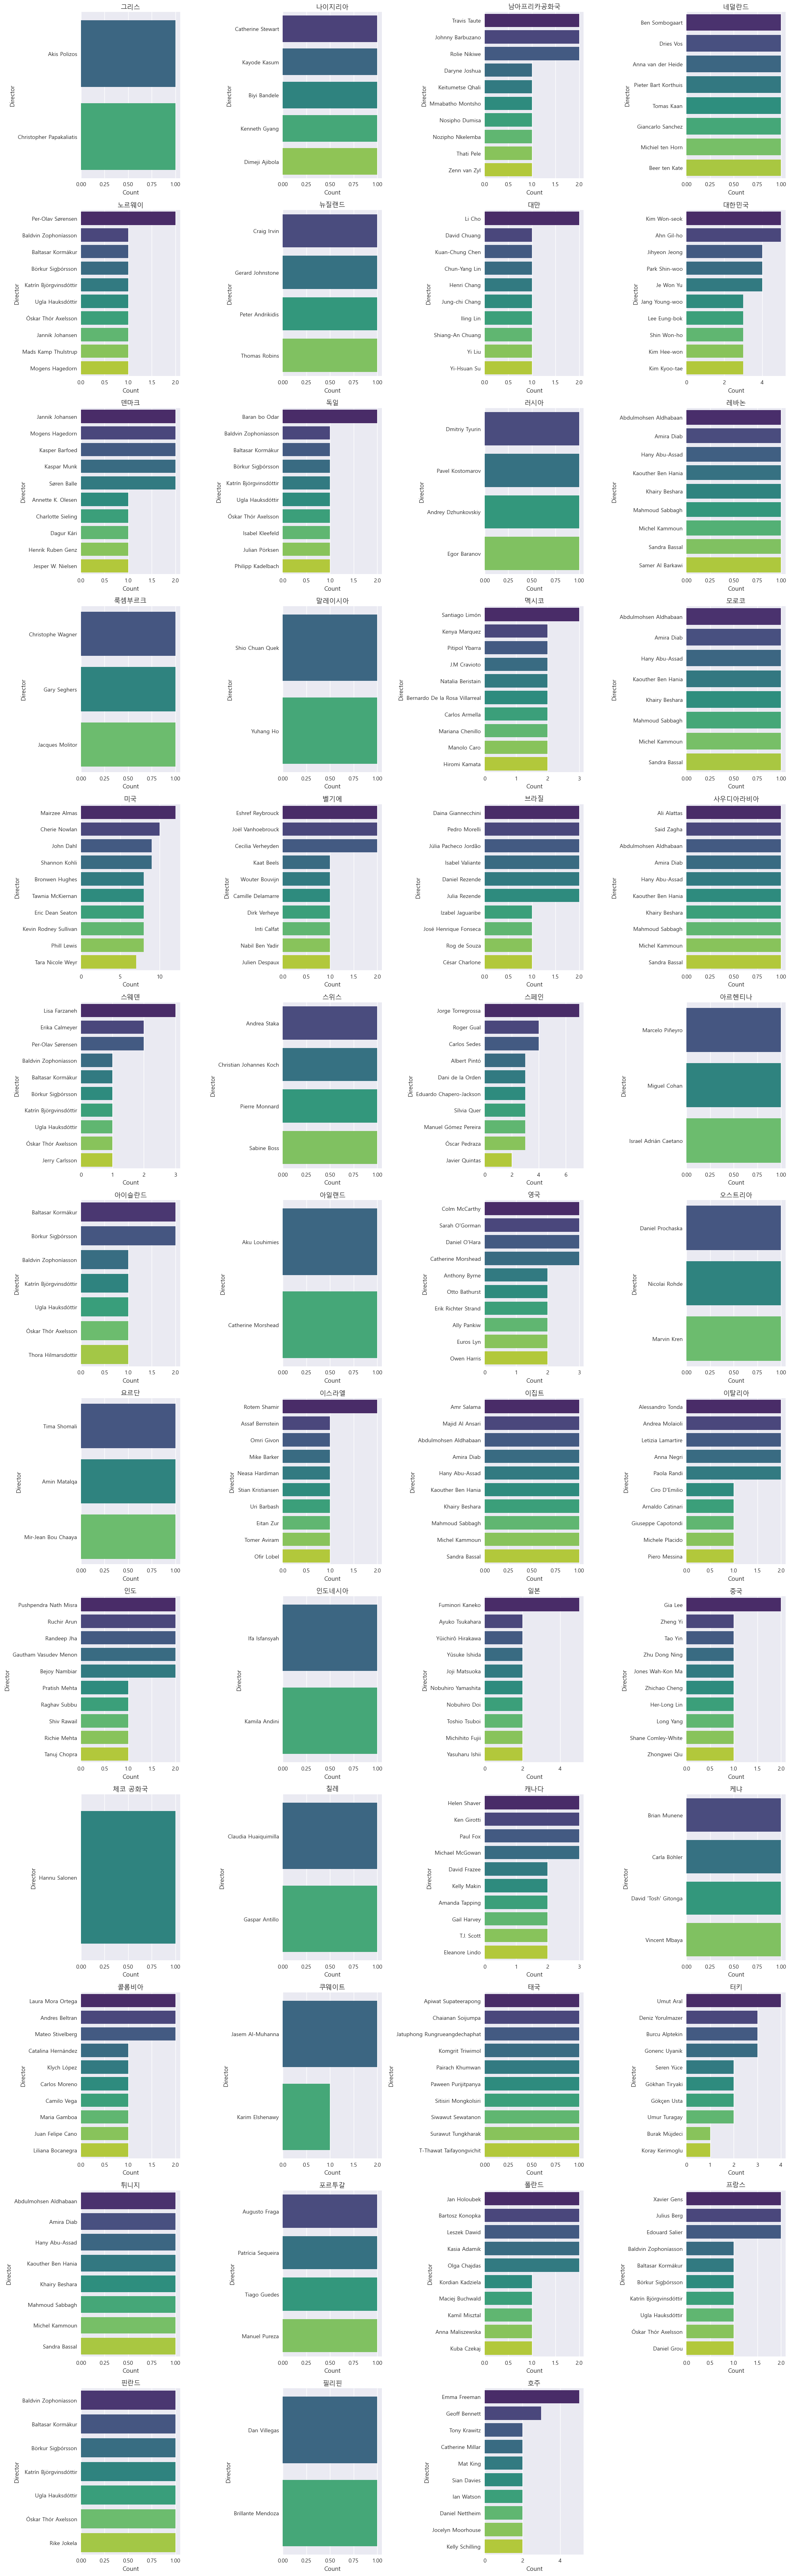

In [48]:
# subplot 생성
num_countries = len(top_directors_per_country)
num_rows = (num_countries // 4) + 1
plt.figure(figsize=(20, 5 * num_rows))

for idx, (country, directors) in enumerate(top_directors_per_country.items()):
    directors_df = pd.DataFrame(directors, columns=['Director', 'Count'])
    
    plt.subplot(num_rows, 4, idx + 1)
    sns.barplot(x='Count', y='Director', data=directors_df, palette='viridis')
    plt.title(country)
    plt.tight_layout()

plt.show()

## 08. 나라별 TOP 작가

In [49]:
# 결측치 처리
final['production_country'] = final['production_country'].fillna('')
final['writer'] = final['writer'].fillna('[]').apply(eval)

# 나라와 작가 데이터프레임 생성
country_writers = []

for index, row in final.iterrows():
    countries = row['production_country'].split(',')
    writers = row['writer']
    for country in countries:
        for writer in writers:
            country_writers.append({'country': country.strip(), 'writer': writer.strip()})

country_writers_df = pd.DataFrame(country_writers)

# 각 나라별 상위 10명의 감독 추출
top_writers_per_country = {}

for country, group in country_writers_df.groupby('country'):
    writer_counts = Counter(group['writer'])
    top_writers = writer_counts.most_common(10)
    top_writers_per_country[country] = top_writers

# 결과 출력
for country, writers in top_writers_per_country.items():
    print(f"Country: {country}")
    for writer, count in writers:
        print(f"  {writer}: {count} 작품")
    print()

Country: 그리스
  Christopher Papakaliatis: 1 작품

Country: 나이지리아
  Chiemeka Osuagwu: 1 작품
  Chinaza Onuzo: 1 작품
  Damilola Elebe: 1 작품
  Craig Freimond: 1 작품
  Temidayo Makanjuola: 1 작품
  Zelipa Zulu: 1 작품
  Ayomikun Paseda: 1 작품
  Donald Tombia: 1 작품
  Shirleyann Ede: 1 작품
  Xavier Ighorodje: 1 작품

Country: 남아프리카공화국
  Daryne Joshua: 2 작품
  Meesha Aboo: 2 작품
  Travis Taute: 2 작품
  Tristram Atkins: 2 작품
  Lwazi Mvusi: 2 작품
  Sunni Faba-Gutu: 2 작품
  Steven Pillemer: 2 작품
  Sydney Dire: 2 작품
  Chinaka Iwunze: 1 작품
  Mmabatho Montsho: 1 작품

Country: 네덜란드
  Bram Renders: 1 작품
  Ian Ginn: 1 작품
  Karin van der Meer: 1 작품
  Maarten Almekinders: 1 작품
  Marnie Blok: 1 작품
  Philip Delmaar: 1 작품
  Franky Ribbens: 1 작품
  Fred Saueressig: 1 작품
  Lotte Tabbers: 1 작품
  Pieter Bart Korthuis: 1 작품

Country: 노르웨이
  Per-Olav Sørensen: 2 작품
  Baltasar Kormákur: 1 작품
  Clive Bradley: 1 작품
  Davíð Már Stefánsson: 1 작품
  Gagga Jonsdottir: 1 작품
  Holly Phillips: 1 작품
  Jóhann Ævar Grímsson: 1 작품
  Klaus Zimmerman

### 시각화

C:\Users\June\AppData\Local\Temp\ipykernel_22064\3448255175.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\3448255175.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\3448255175.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\3448255175.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\3448255175.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\3448255175.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppData\Local\Temp\ipykernel_22064\3448255175.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\June\AppDat

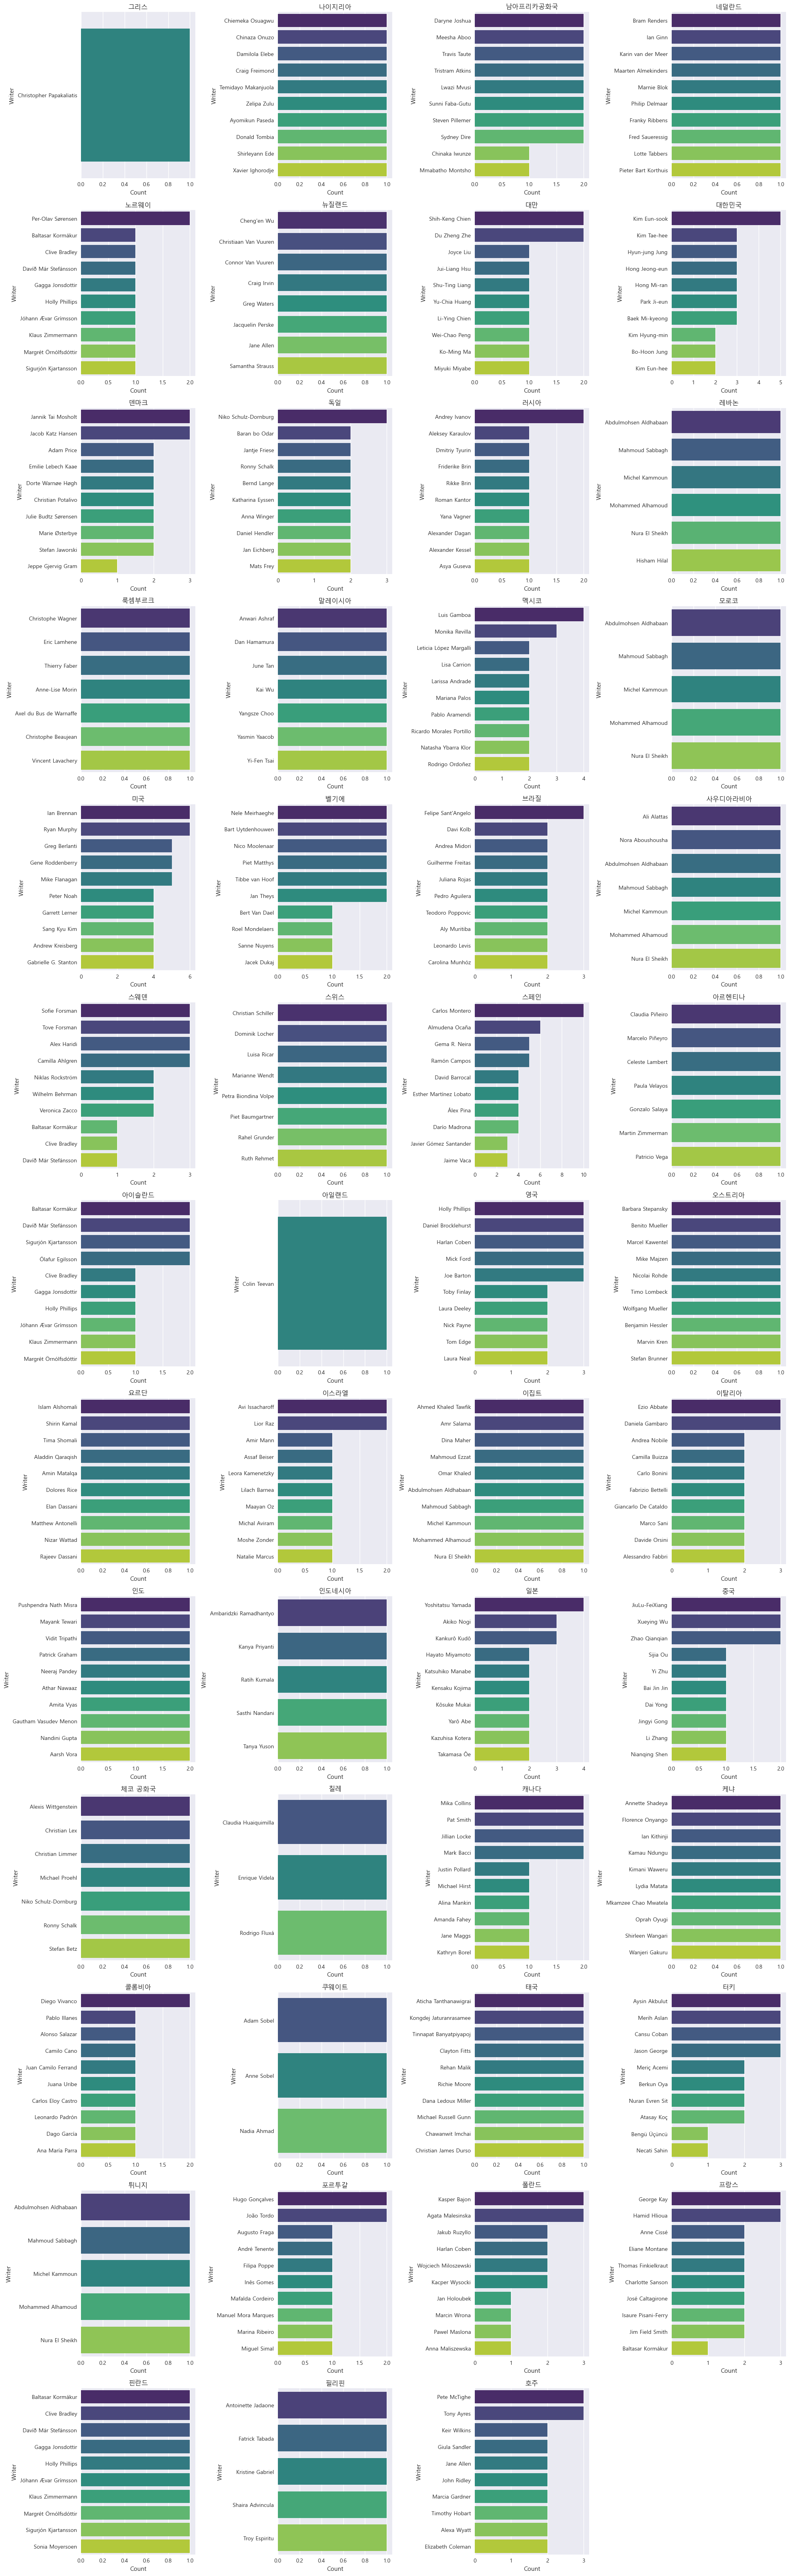

In [50]:
# subplot 생성
num_countries = len(top_writers_per_country)
num_rows = (num_countries // 4) + 1
plt.figure(figsize=(20, 5 * num_rows))

for idx, (country, writers) in enumerate(top_writers_per_country.items()):
    writers_df = pd.DataFrame(writers, columns=['Writer', 'Count'])
    
    plt.subplot(num_rows, 4, idx + 1)
    sns.barplot(x='Count', y='Writer', data=writers_df, palette='viridis')
    plt.title(country)
    plt.tight_layout()

plt.show()

### 나라 TOP5, 작가 TOP5

Country: 미국
Ian Brennan: 6
Ryan Murphy: 6
Greg Berlanti: 5
Gene Roddenberry: 5
Mike Flanagan: 5
Peter Noah: 4
Garrett Lerner: 4
Sang Kyu Kim: 4
Andrew Kreisberg: 4
Gabrielle G. Stanton: 4

Country: 대한민국
nan: 19
Kim Eun-sook: 5
Kim Tae-hee: 3
Hyun-jung Jung: 3
Hong Jeong-eun: 3
Hong Mi-ran: 3
Park Ji-eun: 3
Baek Mi-kyeong: 3
Kim Hyung-min: 2
Bo-Hoon Jung: 2

Country: 영국
Holly Phillips: 3
Daniel Brocklehurst: 3
Harlan Coben: 3
Mick Ford: 3
Joe Barton: 3
Toby Finlay: 2
Laura Deeley: 2
Nick Payne: 2
Tom Edge: 2
Laura Neal: 2

Country: 스페인
Carlos Montero: 10
Almudena Ocaña: 6
Gema R. Neira: 5
Ramón Campos: 5
David Barrocal: 4
Esther Martínez Lobato: 4
Álex Pina: 4
Darío Madrona: 4
Javier Gómez Santander: 3
Jaime Vaca: 3

Country: 일본
Yoshitatsu Yamada: 4
Akiko Nogi: 3
Kankurô Kudô: 3
nan: 2
Hayato Miyamoto: 2
Katsuhiko Manabe: 2
Kensaku Kojima: 2
Kôsuke Mukai: 2
Yarô Abe: 2
Kazuhisa Kotera: 2



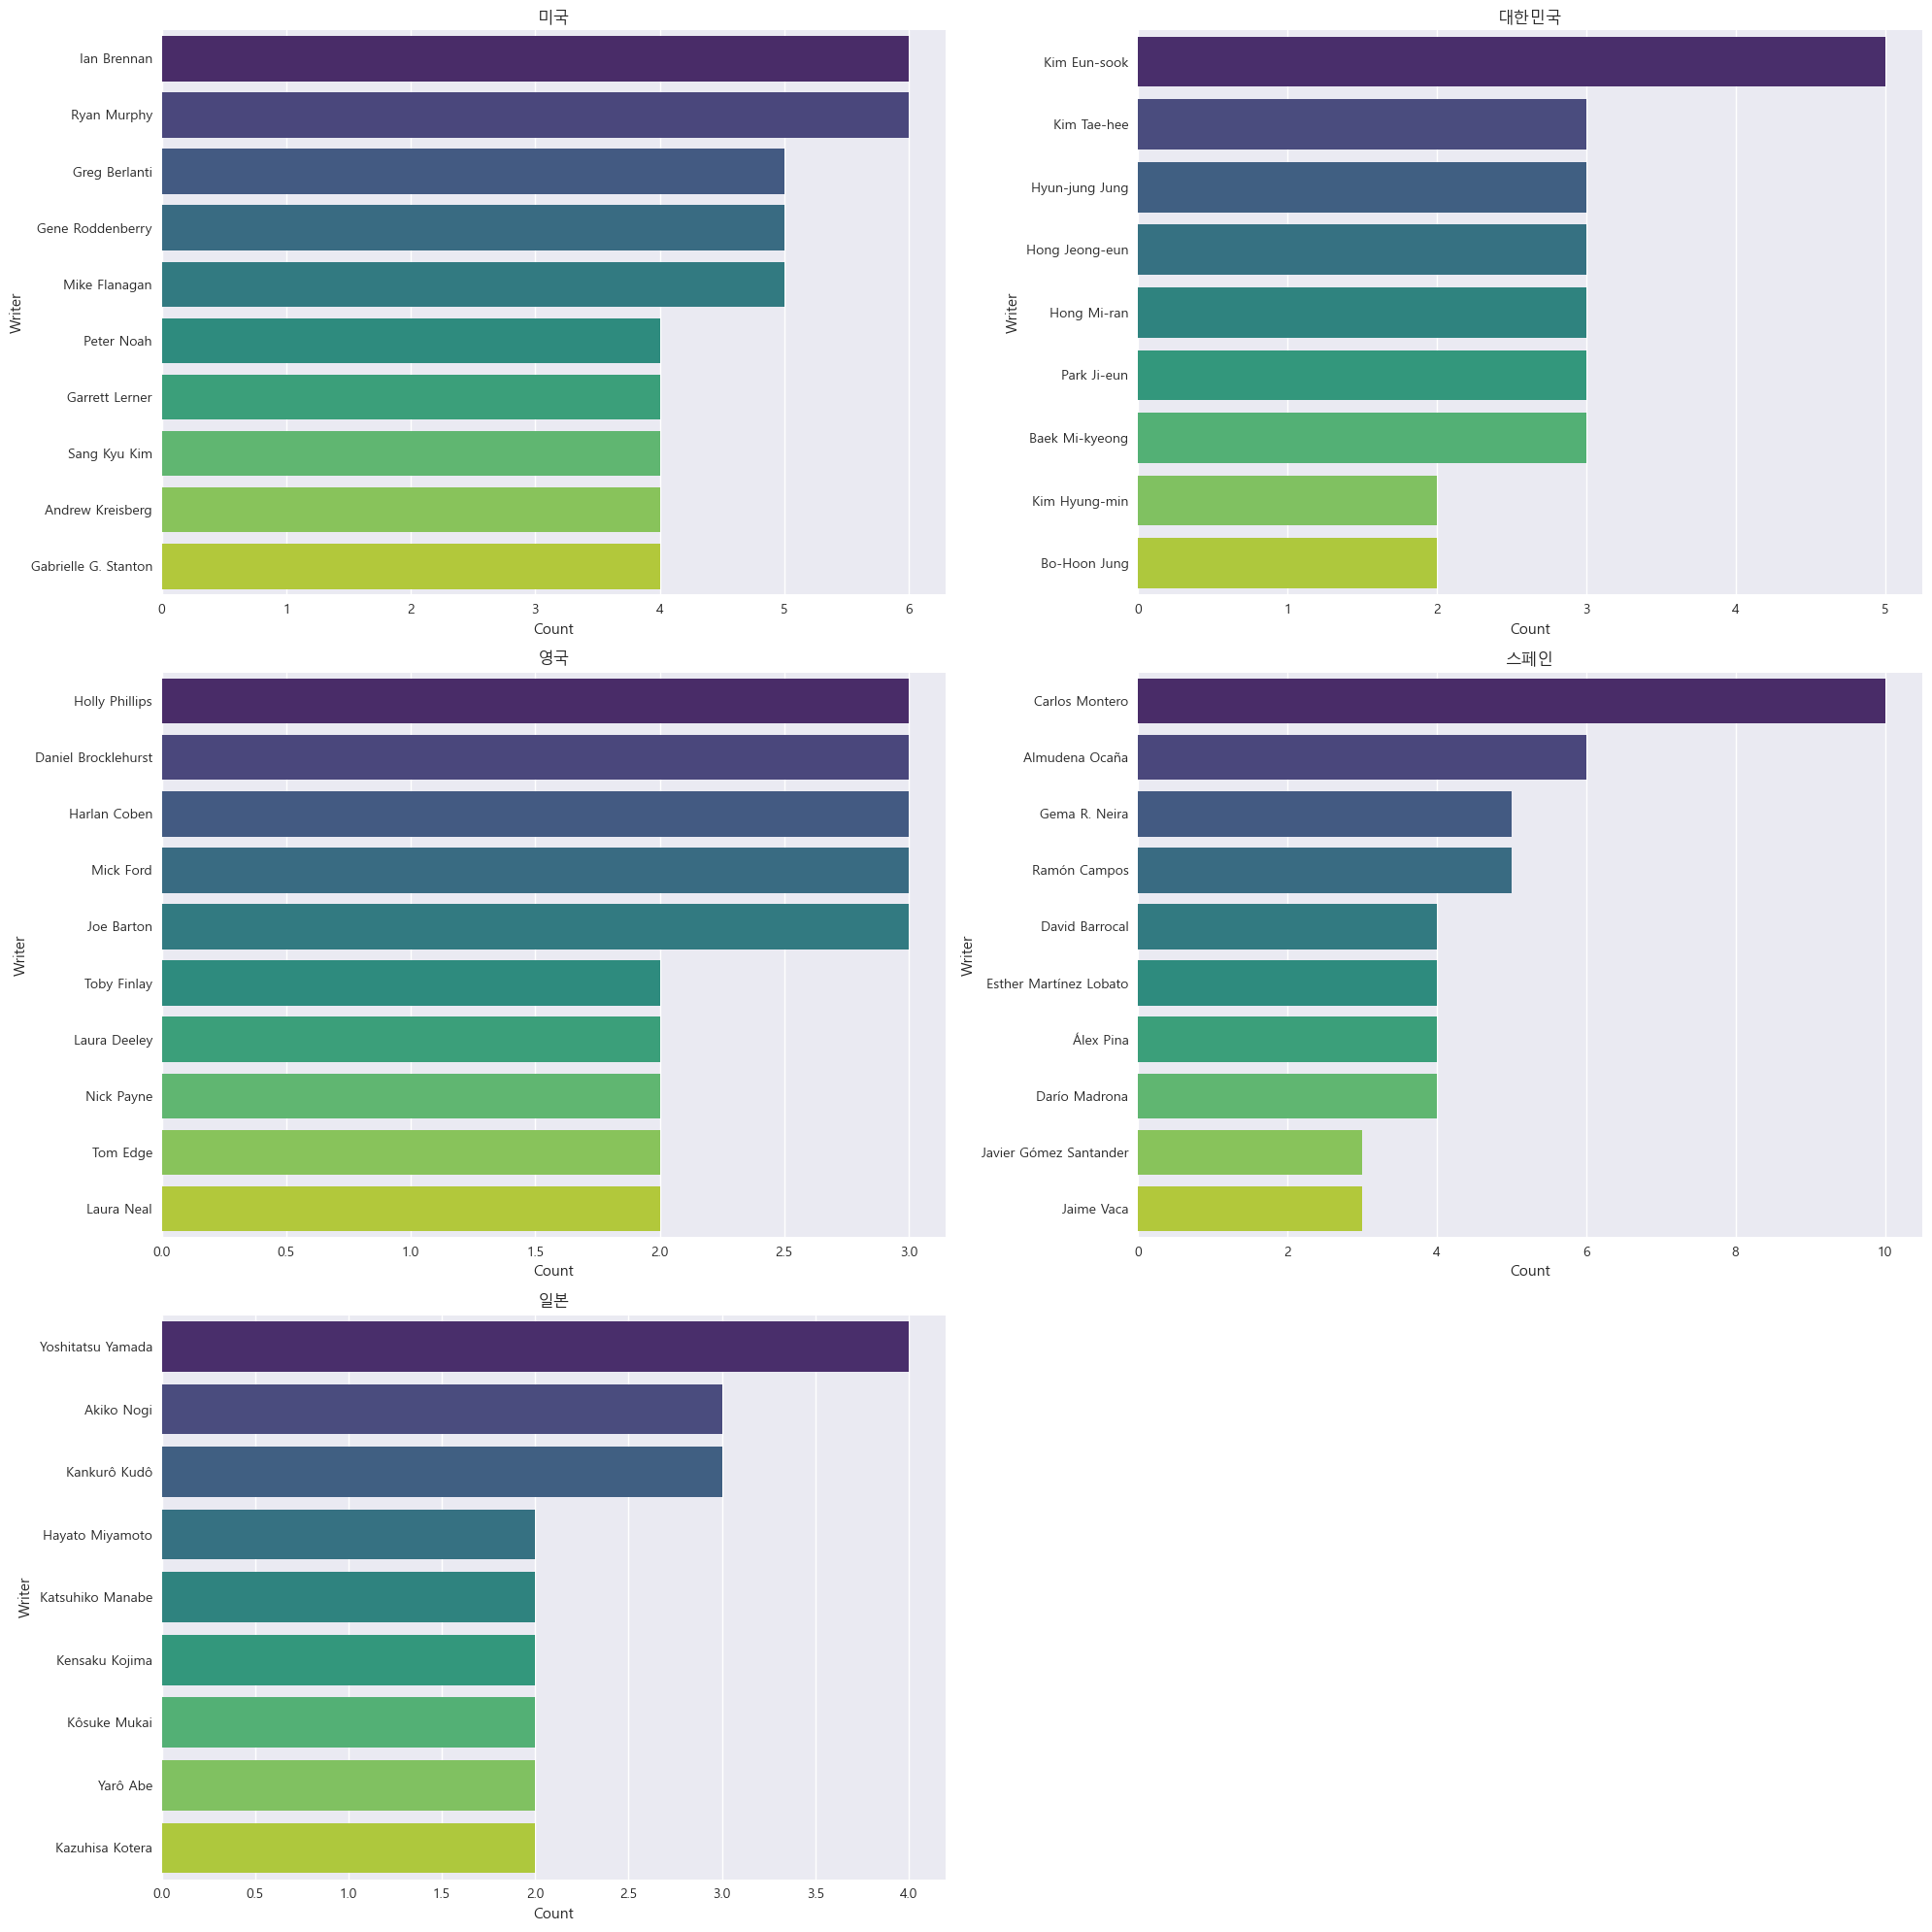

In [52]:
# 넷플릭스 드라마를 가장 많이 제작한 국가 Top 5 추출
top_countries = final['production_country'].value_counts().head(5).index.tolist()

# 감독 정보가 있는 국가별 데이터 필터링
df_filtered = final[final['production_country'].apply(lambda x: any(country in x for country in top_countries))]

# 국가별 감독 리스트를 만들고 상위 10명 추출
top_writers_per_country = {}
for country in top_countries:
    country_df = df_filtered[df_filtered['production_country'].str.contains(country)]
    all_writers = country_df['writer'].explode().tolist()
    most_common_writers = Counter(all_writers).most_common(10)
    top_writers_per_country[country] = most_common_writers

# 결과 출력
for country, writers in top_writers_per_country.items():
    print(f"Country: {country}")
    for writer, count in writers:
        print(f"{writer}: {count}")
    print()

# 그래프 출력
plt.figure(figsize=(20, 20))
for idx, (country, writers) in enumerate(top_writers_per_country.items(), start=1):
    writers_df = pd.DataFrame(writers, columns=['Writer', 'Count'])
    plt.subplot(3, 2, idx)
    sns.barplot(x='Count', y='Writer', data=writers_df, palette='viridis')
    plt.title(country)
plt.tight_layout()
plt.show()

## 09. 시즌 갭 

In [53]:
# total_season_num이 2 이상인 행 필터링
filtered_final = final[final['total_season_num'] >= 2]
filtered_final

,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,total_count,total_rate,...,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url,wins,nominations
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
3,스위트 투스: 사슴뿔을 가진 소년,Sweet Tooth,2021,2,52,"SF, 드라마, 판타지, 액션",15,미국,68000,7.7,...,NaN,NaN,NaN,"[Alexis Ostrander, Carol Banker, Ciarán Foy, J...","[Beth Schwartz, Bo Yeon Kim, Carly Woodworth, ...","['Nonso Anozie', 'Christian Convery', 'Stefani...",Sweet Tooth (TV Series 2021),https://www.imdb.com/title/tt12809988/,12,26
4,스위트홈,Sweet Home,2020,2,60,"스릴러, 드라마, 판타지, 공포, SF, 범죄",19,대한민국,33000,7.3,...,NaN,NaN,NaN,"[Jang Young-woo, Lee Eung-bok, Park So-hyun]","[Hong So-ri, Hwang Young-Chan, Kim Hyung-min, ...","['Song Kang', 'Lee Jin-wook', 'Lee Si-young', ...",Sweet Home (TV Series 2020),https://www.imdb.com/title/tt11612120/,1,3
6,굿 닥터,The Good Doctor,2017,6,43,드라마,15,미국,116000,8.0,...,NaN,NaN,NaN,"[Aaron Rottinghaus, Allison Liddi-Brown, Alric...","[Adam Scott Weissman, April Fitzsimmons, Bill ...","['Freddie Highmore', 'Richard Schiff', 'Hill H...",The Good Doctor (TV Series 2017–2024),https://www.imdb.com/title/tt6470478/,6,29
7,워킹 데드,The Walking Dead,2010,11,46,"드라마, SF, 액션, 공포, 스릴러",19,미국,1100000,8.1,...,NaN,NaN,NaN,"[Aisha Tyler, Alrick Riley, Avi Youabian, Bill...","[Adam Fierro, Angela Kang, Channing Powell, Ch...","['Norman Reedus', 'Melissa McBride', 'Lauren C...",The Walking Dead (TV Series 2010–2022),https://www.imdb.com/title/tt1520211/,85,237
8,"비르기트: 왕국, 권력, 영광",Borgen - Power & Glory,2022,4,58,"전쟁, 드라마, Made in Europe",15,덴마크,30000,8.5,...,NaN,NaN,NaN,"[Annette K. Olesen, Charlotte Sieling, Dagur K...","[Adam Price, Emilie Lebech Kaae, Jannik Tai Mo...","['Sidse Babett Knudsen', 'Birgitte Hjort Søren...",Borgen (TV Series 2010–2022),https://www.imdb.com/title/tt1526318/,9,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,꽃들의 집,The House of Flowers,2018,3,31,"드라마, 코미디",19,멕시코,8600,7.6,...,NaN,NaN,NaN,"[Alberto Belli, Gabriel Nuncio, Manolo Caro, S...","[Alexandro Aldrete, Dariela Pérez Hernández, G...","['Cecilia Suárez', 'Claudette Maillé', 'Dario ...",The House of Flowers (TV Series 2018–2020),https://www.imdb.com/title/tt8387348/,5,11
869,우리가 몰랐던 그녀,She,2020,2,41,"드라마, 범죄",19,인도,6500,6.4,...,NaN,NaN,NaN,"[Arif Ali, Avinash Das]","[Anuja Gondhalekar, Divya Johry, Imtiaz Ali, M...","['Shivani Rangole', 'Aditi Sudhir Pohankar', '...",She (TV Series 2020),https://www.imdb.com/title/tt11905720/,0,6
881,악플러는 꺼져주세요,Haters Back Off,2016,2,30,"코미디, 드라마, 가족, 로맨스",15,미국,7900,5.9,...,NaN,NaN,NaN,"[Andrew Gaynord, Benjamin Berman, Brian Dannel...","[Christopher Ballinger, Colleen Ballinger, Gig...","['Colleen Ballinger', 'Angela Kinsey', 'France...",Haters Back Off! (TV Series 2016–2017),https://www.imdb.com/title/tt5467814/,3,1


In [54]:
from datetime import datetime

# 시즌별 데이터를 담을 리스트 초기화
season_columns = [f'season_{i}' for i in range(1, 18)]  # 시즌 1부터 시즌 17까지

# 결과를 담을 리스트 초기화
season_gaps = []

# 각 행을 순회하며 시즌 간격을 계산
for idx, row in filtered_final.iterrows():
    # 시즌 데이터를 담을 리스트 초기화
    seasons = []
    
    for season_col in season_columns:
        if season_col in row and pd.notnull(row[season_col]):
            season_data = eval(row[season_col])  # 문자열을 dict 형태로 변환
            seasons.append(season_data)
    
    # 시즌이 2개 이상인 경우에만 계산
    if len(seasons) > 1:
        for i in range(len(seasons) - 1):
            try:
                # 현재 시즌의 마지막 에피소드 방영일자
                last_episode_current_season = list(seasons[i].values())[-1][2]
                if last_episode_current_season:
                    last_air_date = datetime.strptime(last_episode_current_season, "%a, %b %d, %Y")
                else:
                    continue
                
                # 다음 시즌의 첫 번째 에피소드 방영일자
                first_episode_next_season = list(seasons[i + 1].values())[0][2]
                if first_episode_next_season:
                    next_air_date = datetime.strptime(first_episode_next_season, "%a, %b %d, %Y")
                else:
                    continue
                
                # 시즌 간의 간격 계산
                gap_days = (next_air_date - last_air_date).days
                gap_years_months = f"{gap_days // 365}년 {gap_days % 365 // 30}개월"
                
                # 결과 저장
                season_gaps.append({
                    'korean_title': row['korean_title'],
                    'season': f"Season {i + 1} to Season {i + 2}",
                    'gap_days': gap_days,
                    'gap_years_months': gap_years_months
                })
            except KeyError as e:
                print(f"KeyError: {e} in row {idx} for season {i + 1} to season {i + 2}")
            except ValueError as e:
                print(f"ValueError: {e} in row {idx} for season {i + 1} to season {i + 2}")

# 결과 데이터 프레임 생성
season_gaps_df = pd.DataFrame(season_gaps)

# 결과 출력
season_gaps_df.head()

,korean_title,season,gap_days,gap_years_months
0,스위트 투스: 사슴뿔을 가진 소년,Season 1 to Season 2,692,1년 10개월
1,스위트홈,Season 1 to Season 2,1078,2년 11개월
2,굿 닥터,Season 1 to Season 2,182,0년 6개월
3,굿 닥터,Season 2 to Season 3,196,0년 6개월
4,굿 닥터,Season 3 to Season 4,217,0년 7개월


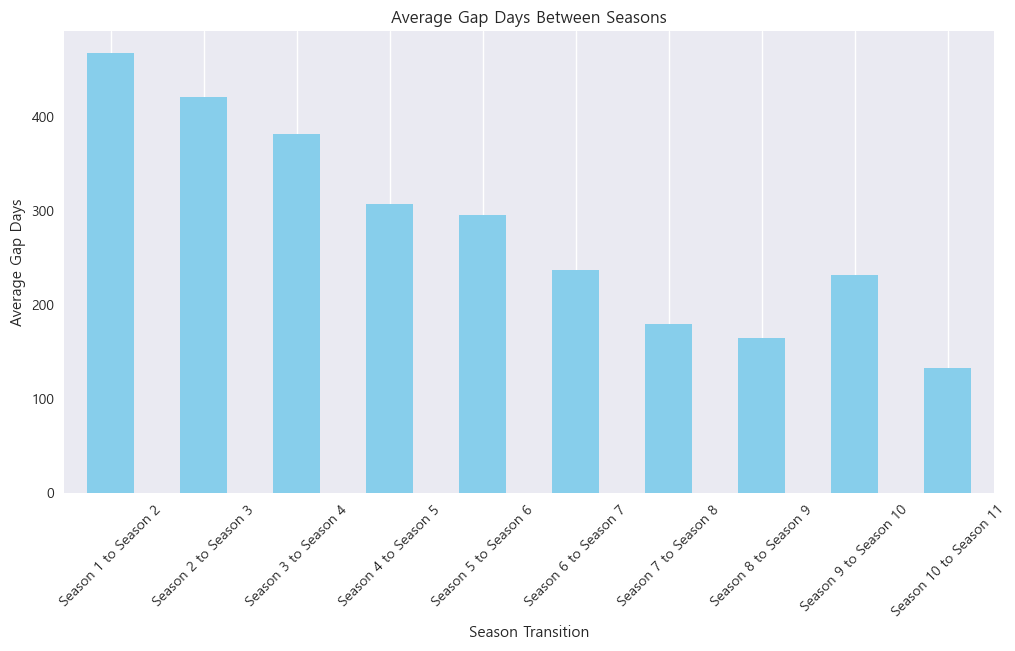

In [55]:
# 시즌 간의 gap_days 평균 계산
average_gap_days = season_gaps_df.groupby('season')['gap_days'].mean()

# 시즌 순서 정렬
sorted_season_transitions = sorted(average_gap_days.index, key=lambda x: (int(x.split()[1]), int(x.split()[4])))

# 그래프 생성
plt.figure(figsize=(12, 6))
average_gap_days = average_gap_days.reindex(sorted_season_transitions)
average_gap_days.plot(kind='bar', color='skyblue')
plt.xlabel('Season Transition')
plt.ylabel('Average Gap Days')
plt.title('Average Gap Days Between Seasons')
plt.xticks(rotation=45)
plt.grid(axis='y')

# 그래프 출력
plt.show()

## 10. 시즌1과 시즌2의 평점과 평점 참여 인원수

In [56]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        905 non-null    object 
 1   english_title       905 non-null    object 
 2   year                905 non-null    int64  
 3   total_season_num    905 non-null    int64  
 4   runtime             905 non-null    int64  
 5   genre               905 non-null    object 
 6   age_rating          905 non-null    object 
 7   production_country  905 non-null    object 
 8   total_count         905 non-null    int64  
 9   total_rate          905 non-null    float64
 10  watchlist           905 non-null    int64  
 11  popularity          905 non-null    int64  
 12  user_review         905 non-null    int64  
 13  critic_review       905 non-null    int64  
 14  production          821 non-null    object 
 15  distributor         897 non-null    object 
 16  season_1     

In [31]:
# # IMDb 평점
# def get_imdb_rate(x):
#     imdb_rate_lst = []

#     # 딕셔너리에서 평점 부분만 가져옴
#     for idx, val in x.items():
#         imdb_rate_lst.append(val[0])

#     # 시즌 평점 평균 구하기
#     imdb_rate = np.mean(imdb_rate_lst)

#     return imdb_rate

# # IMDb 평점 매긴 사람 수
# def get_imdb_rate_cnt(x):
#     imdb_rate_cnt_lst = []

#     # 딕셔너리에서 평점 매긴 사람만 가져옴
#     for idx, val in x.items():
#         imdb_rate_cnt_lst.append(val[1])


#     # 평점을 매긴 사람의 시즌 평균 구하기
#     imdb_rate_cnt = np.mean(imdb_rate_cnt_lst)

#     return imdb_rate_cnt

In [57]:
df_2 = final[final['total_season_num']>=2]

In [58]:
# 딕셔너리 해제
for i in range(1, 3):  # 1에서 2까지
    column_name = 'season_{}'.format(i)
    df_2[column_name] = df_2[column_name].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

# 평점 계산 함수 정의 (예제)
def get_imdb_rate(season_data):
    if not season_data:
        return None
    imdb_rate_lst = [val[0] for val in season_data.values()]
    return sum(imdb_rate_lst) / len(imdb_rate_lst)

def get_imdb_rate_cnt(season_data):
    if not season_data:
        return None
    imdb_rate_cnt_lst = [val[1] for val in season_data.values()]
    return sum(imdb_rate_cnt_lst)

# 시즌 1 평점 계산
df_2['i_s1_rate'] = df_2['season_1'].apply(get_imdb_rate)
df_2['i_s1_rate_cnt'] = df_2['season_1'].apply(get_imdb_rate_cnt)

# 시즌 2 평점 계산
df_2['i_s2_rate'] = df_2['season_2'].apply(get_imdb_rate)
df_2['i_s2_rate_cnt'] = df_2['season_2'].apply(get_imdb_rate_cnt)

C:\Users\June\AppData\Local\Temp\ipykernel_22064\2363088660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[column_name] = df_2[column_name].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
C:\Users\June\AppData\Local\Temp\ipykernel_22064\2363088660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[column_name] = df_2[column_name].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
C:\Users\June\AppData\Local\Temp\ipykernel_22064\2363088660.py:20: SettingWithCopyWarning:

In [59]:
# 시즌 1 평점 계산
df_2.loc[:, 'i_s1_rate'] = df_2['season_1'].apply(get_imdb_rate)
df_2.loc[:, 'i_s1_rate_cnt'] = df_2['season_1'].apply(get_imdb_rate_cnt)

# 시즌 2 평점 계산
df_2.loc[:, 'i_s2_rate'] = df_2['season_2'].apply(get_imdb_rate)
df_2.loc[:, 'i_s2_rate_cnt'] = df_2['season_2'].apply(get_imdb_rate_cnt)

In [60]:
# 데이터 불러오기 2
watcha = pd.read_excel('data/watcha_최종본.xlsx', index_col=0)

# 리스트 해제
for i in range(1, 12):
    watcha['season_{}'.format(i)] = watcha.loc[watcha['season_{}'.format(i)].notnull(), 'season_{}'.format(i)].apply(ast.literal_eval)

watcha.tail()

,korean_title,english_title,year,total_season_num,production_country,watcha_name,season_1,season_2,season_3,season_4,...,season_8,season_9,season_10,season_11,season_12,season_13,season_14,season_15,season_16,season_17
900,레일라,Leila,2019,1,인도,['레일라'],"[3.2, 27, 3]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,100만 엔의 여인들,Million Yen Women,2017,1,일본,['100만 엔의 여자들'],"[3.0, 718, 100]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,킬러 코미디언,Hasmukh,2020,1,인도,['킬러 코미디언'],"[1.6, 4, 0]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,달러,Dollar,2019,1,레바논,['달러'],"[0.7, 3, 1]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,"엘리트들, 못다 한 이야기: 나디아 구스만",Elite Short Stories: Nadia Guzmán,2021,1,스페인,"['엘리트들, 못다 한 이야기: 나디아 구스만']","[2.8, 420, 30]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# 왓챠 평점
def get_watcha_rate(x):
    if isinstance(x, float):
        return None
    watcha_tmp = x
    watcha_rate = watcha_tmp[0]
    return watcha_rate

# 왓챠 평점을 매긴 사람 수
def get_watcha_rate_cnt(x):
    if isinstance(x, float):
        return None
    watcha_tmp = x
    watcha_rate_cnt = watcha_tmp[1]
    return watcha_rate_cnt

In [62]:
# 시즌 1 평점 계산
watcha['w_s1_rate'] = watcha['season_1'].apply(get_watcha_rate)
watcha['w_s1_rate_cnt'] = watcha['season_1'].apply(get_watcha_rate_cnt)
# 시즌 2 평점 계산
watcha['w_s2_rate'] = watcha['season_2'].apply(get_watcha_rate)
watcha['w_s2_rate_cnt'] = watcha['season_2'].apply(get_watcha_rate_cnt)

In [63]:
df = pd.merge(df_2, watcha, on=['korean_title','english_title','year'], how='left')

In [64]:
df['w_s1_rate_cnt']

0        2860
1       64000
2       79000
3      326000
4         129
        ...  
261       436
262        39
263       378
264        93
265        84
Name: w_s1_rate_cnt, Length: 266, dtype: int64

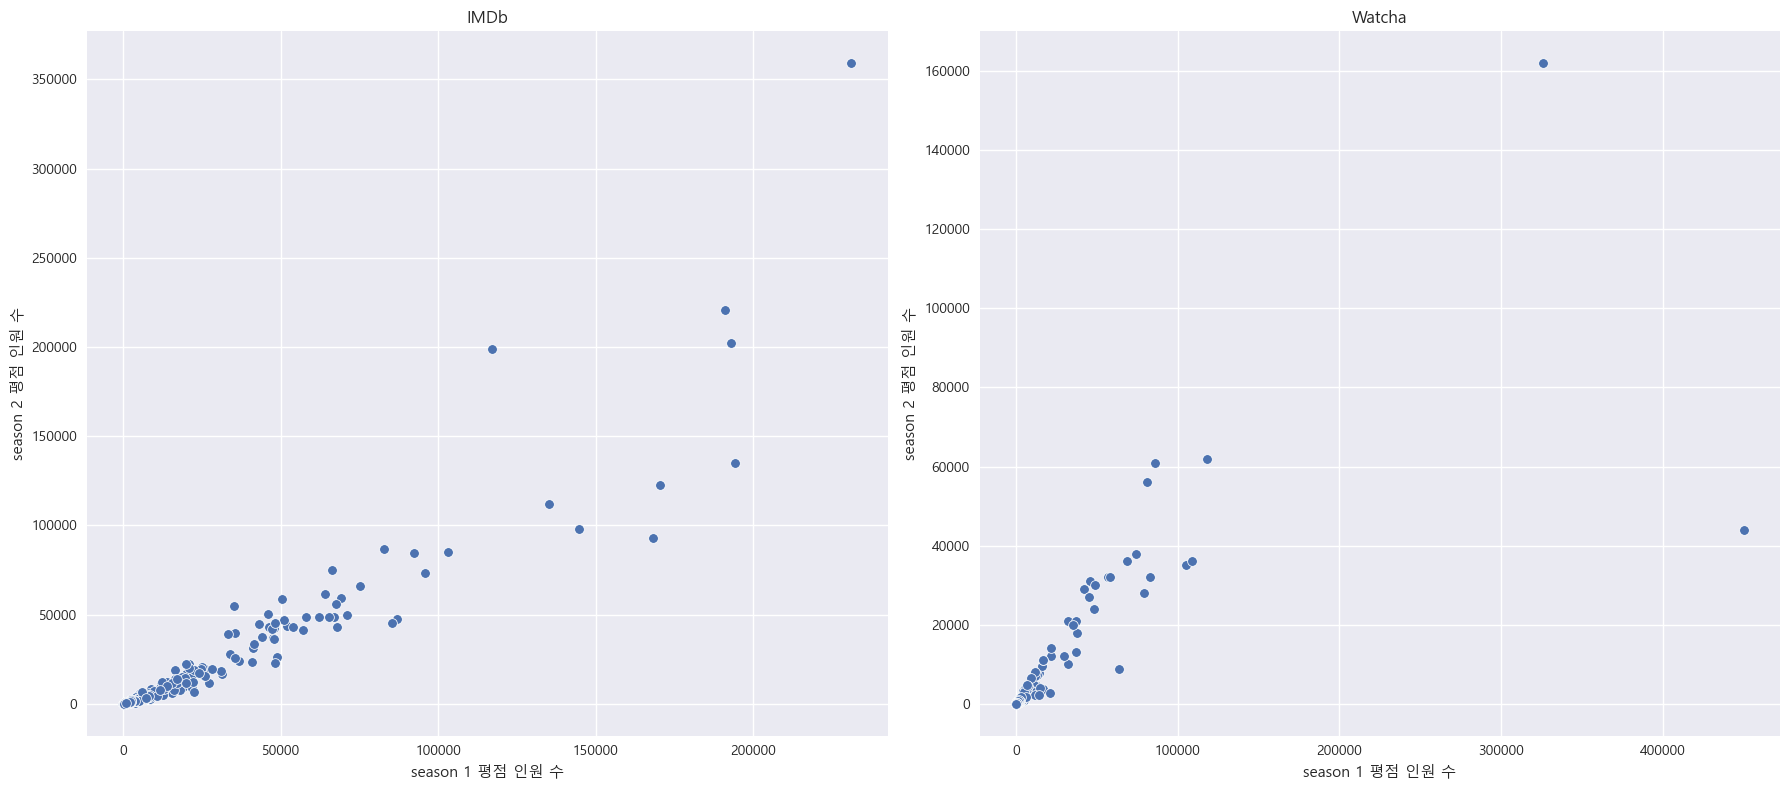

In [65]:
# 그래프 크기 설정
plt.figure(figsize=(18, 8))

# 첫 번째 subplot (1행 2열의 첫 번째)
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='i_s1_rate_cnt', y='i_s2_rate_cnt')
plt.title('IMDb')
plt.xlabel('season 1 평점 인원 수')
plt.ylabel('season 2 평점 인원 수')

# 두 번째 subplot (1행 2열의 두 번째)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='w_s1_rate_cnt', y='w_s2_rate_cnt')
plt.title('Watcha')
plt.xlabel('season 1 평점 인원 수')
plt.ylabel('season 2 평점 인원 수')

# 그래프 보여주기
plt.tight_layout()  # subplot 간 간격 조정
plt.show()

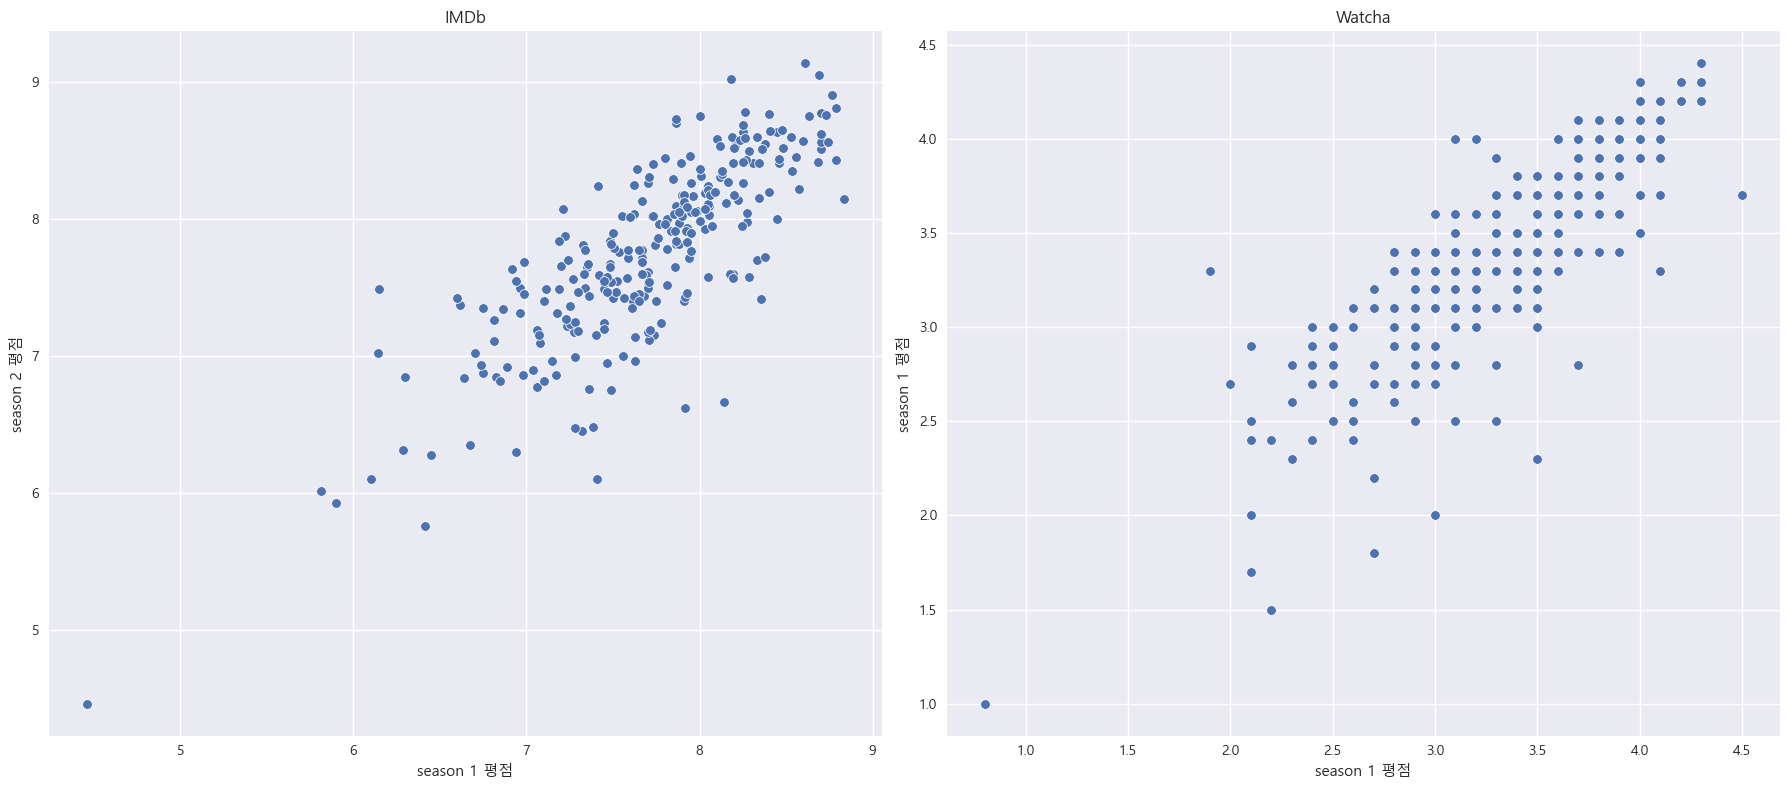

In [66]:
# 그래프 크기 설정
plt.figure(figsize=(18, 8))

# 첫 번째 subplot (1행 2열의 첫 번째)
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='i_s1_rate', y='i_s2_rate')
plt.title('IMDb')
plt.xlabel('season 1 평점')
plt.ylabel('season 2 평점')

# 두 번째 subplot (1행 2열의 두 번째)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='w_s1_rate', y='w_s2_rate')
plt.title('Watcha')
plt.xlabel('season 1 평점')
plt.ylabel('season 1 평점')

# 그래프 보여주기
plt.tight_layout()  # subplot 간 간격 조정
plt.show()